In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Movies.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Data_Dictionary.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/LICENSE
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Places.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Spells.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Chapters.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Dialogue.csv


![](https://cdnb.artstation.com/p/assets/images/images/014/872/099/large/valerio-dreelrayk-buonfantino-h-r-h.jpg?1546015990)

In [2]:
#Import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chapters_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Chapters.csv",encoding= 'unicode_escape')

In [4]:
chapters_data.head()

,Chapter ID,Chapter Name,Movie ID,Movie Chapter
0,1,Doorstep Delivery,1,1
1,2,The Vanishing Glass,1,2
2,3,Letters from No One,1,3
3,4,Keeper of the Keys,1,4
4,5,Diagon Alley,1,5


In [5]:
chapters_data.tail()

,Chapter ID,Chapter Name,Movie ID,Movie Chapter
229,230,Declare Yourself,8,22
230,231,Not Over,8,23
231,232,The Wand's Choice,8,24
232,233,The Wizard's Choice,8,25
233,234,Nineteen Years Later,8,26


In [6]:
chapters_data.isnull().sum()

Chapter ID       0
Chapter Name     0
Movie ID         0
Movie Chapter    0
dtype: int64

In [7]:
# Drop the chapter ID and Movie ID it's not important for now.

chapters_data = chapters_data.drop(['Chapter ID','Movie ID'],axis=1)

In [8]:
chapters_data.head()

,Chapter Name,Movie Chapter
0,Doorstep Delivery,1
1,The Vanishing Glass,2
2,Letters from No One,3
3,Keeper of the Keys,4
4,Diagon Alley,5


In [9]:
chapters_data.shape

(234, 2)

In [10]:
chapters_data.nunique()

Chapter Name     232
Movie Chapter     40
dtype: int64

In [11]:
chapters_data = chapters_data.rename(columns = {'Chapter Name': 'chapter_name', 'Movie Chapter': 'movie_chapter'}, inplace = False)

In [12]:
chapters_data.head()

,chapter_name,movie_chapter
0,Doorstep Delivery,1
1,The Vanishing Glass,2
2,Letters from No One,3
3,Keeper of the Keys,4
4,Diagon Alley,5


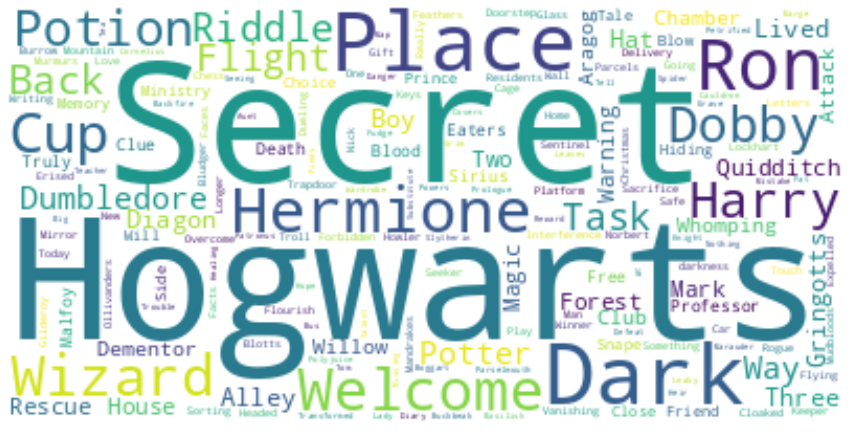

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in chapters_data.chapter_name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Characters dataset

![](https://images.ctfassets.net/usf1vwtuqyxm/7uvSbEoXfi0yowuWOiUM0e/78a2f161545b981f0ec2416c357519d9/Harry_Potter.jpg)

In [14]:
cha_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv",encoding= 'unicode_escape')

In [15]:
cha_data.head()

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN


In [16]:
cha_data = cha_data.drop('Character ID',axis=1)

In [17]:
cha_data.isnull().sum()

Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

In [18]:
cha_data.shape

(166, 7)

In [19]:
import missingno as msno

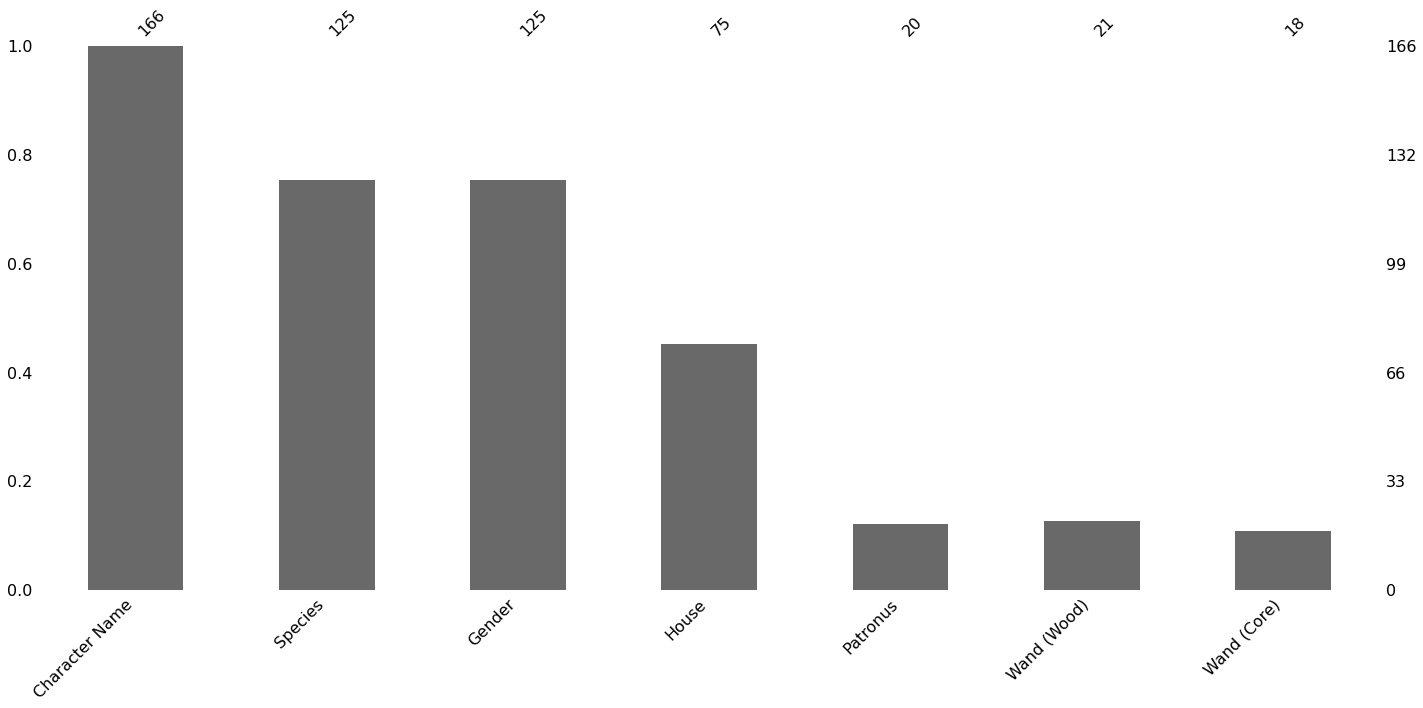

In [20]:
msno.bar(cha_data)
plt.show()

In [21]:
cha_data.isnull().mean() * 100 # Check in percentages of missing values.

Character Name     0.000000
Species           24.698795
Gender            24.698795
House             54.819277
Patronus          87.951807
Wand (Wood)       87.349398
Wand (Core)       89.156627
dtype: float64

In [22]:
cha_data = cha_data.dropna()

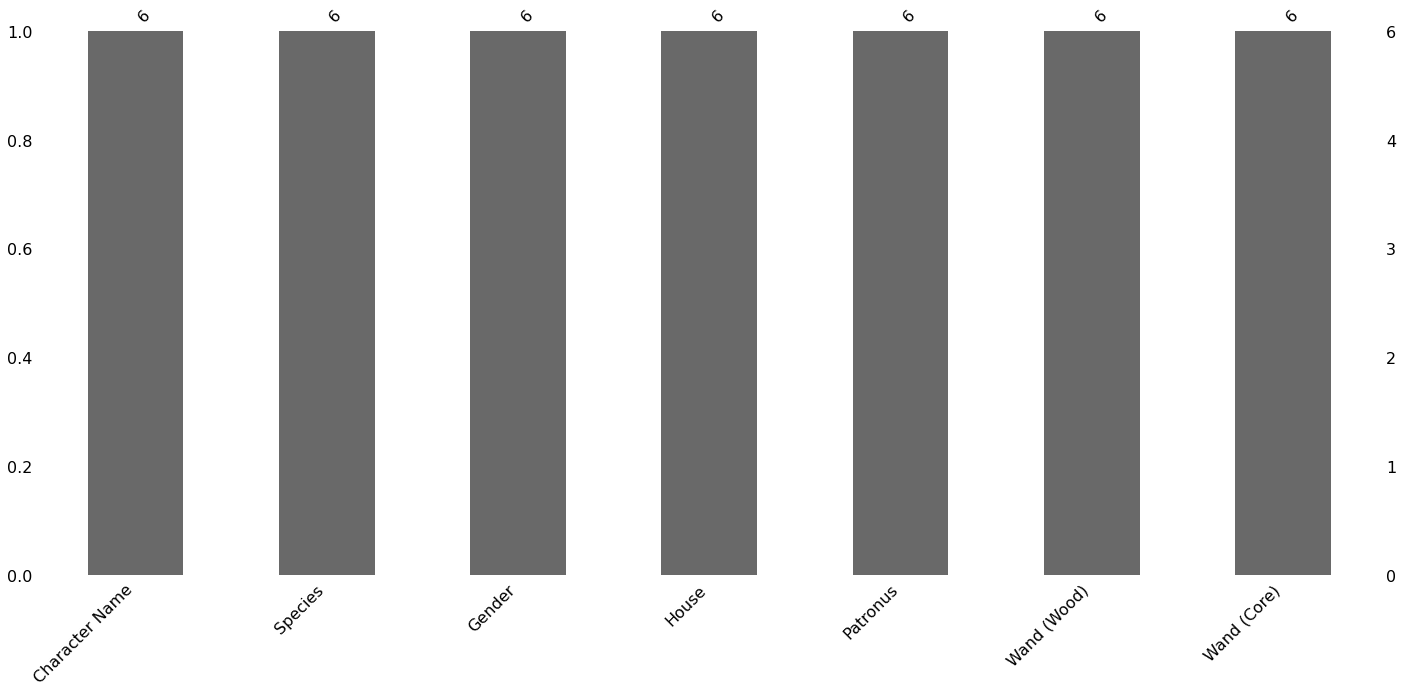

In [23]:
msno.bar(cha_data)
plt.show()

In [24]:
cha_data

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
2,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
6,Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring
10,Remus Lupin,Werewolf,Male,Gryffindor,Wolf,Cypress,Unicorn Hair
14,Dolores Umbridge,Human,Female,Slytherin,Cat,Birch,Dragon Heartstring


In [25]:
cha_data.nunique()

Character Name    6
Species           2
Gender            2
House             2
Patronus          5
Wand (Wood)       6
Wand (Core)       4
dtype: int64

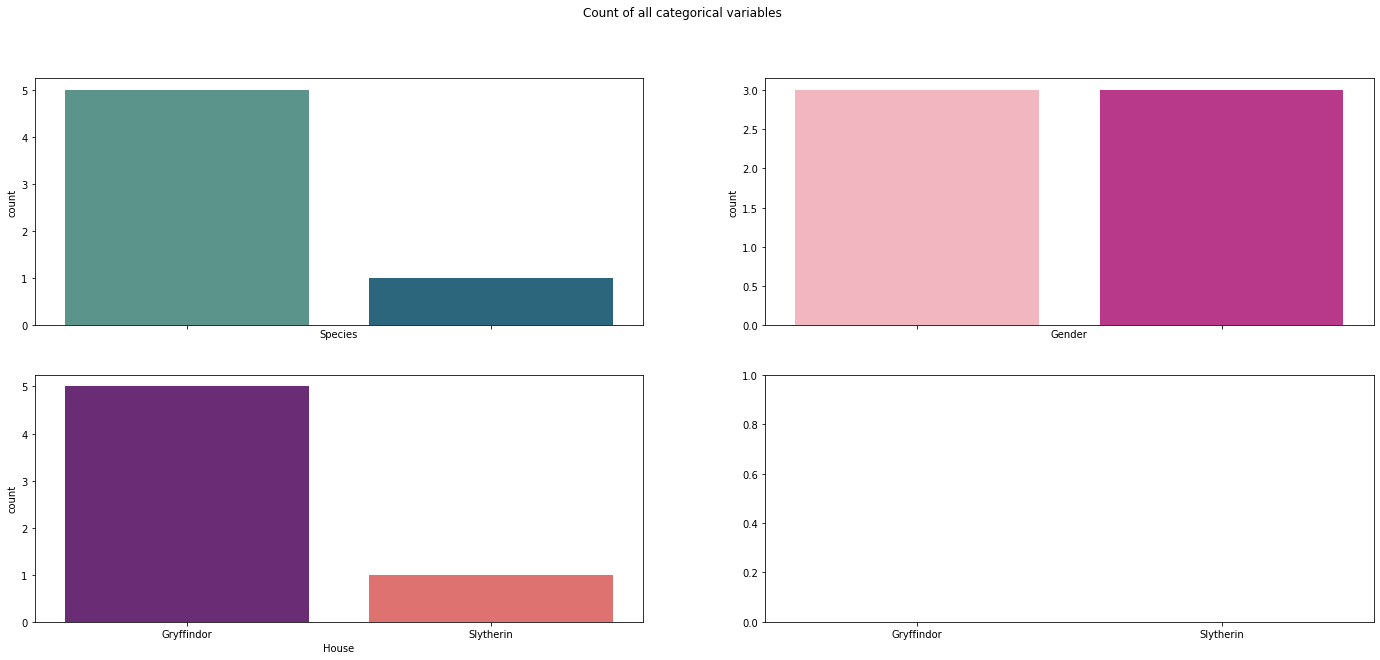

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(24,10))
fig.suptitle('Count of all categorical variables')
sns.countplot(ax=axes[0, 0], data=cha_data, x='Species',palette='crest')
sns.countplot(ax=axes[0, 1], data=cha_data, x='Gender',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=cha_data, x='House',palette='magma')
plt.show()

In [27]:
cha_df = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv",encoding= 'unicode_escape')

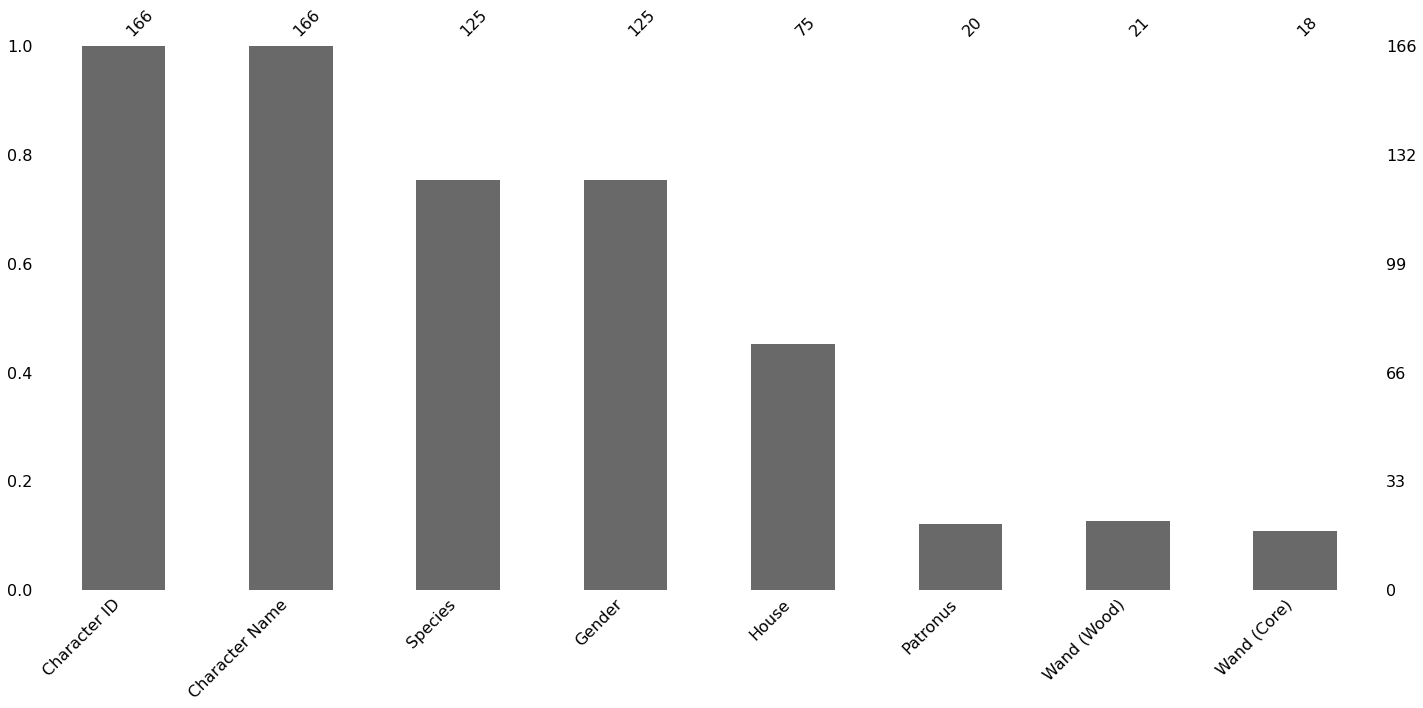

In [28]:
msno.bar(cha_df)
plt.show()

In [29]:
cha_df.isnull().mean() * 100 # Check in percentages of missing values.

Character ID       0.000000
Character Name     0.000000
Species           24.698795
Gender            24.698795
House             54.819277
Patronus          87.951807
Wand (Wood)       87.349398
Wand (Core)       89.156627
dtype: float64

In [30]:
cha_df = cha_df.drop(['Patronus','House','Wand (Wood)','Wand (Core)'],axis=1)

In [31]:
cha_df.isnull().sum()

Character ID       0
Character Name     0
Species           41
Gender            41
dtype: int64

In [32]:
cha_df = cha_df.drop('Character ID',axis=1)

In [33]:
cha_df.head()

,Character Name,Species,Gender
0,Harry Potter,Human,Male
1,Ron Weasley,Human,Male
2,Hermione Granger,Human,Female
3,Albus Dumbledore,Human,Male
4,Rubeus Hagrid,Half-Human/Half-Giant,Male


In [34]:
cha_df['Gender'] = cha_df['Gender'].fillna(cha_df['Gender'].value_counts().idxmax())

In [35]:
cha_df['Species'] = cha_df['Species'].fillna(cha_df['Species'].value_counts().idxmax())

In [36]:
cha_df.isnull().sum()

Character Name    0
Species           0
Gender            0
dtype: int64

In [37]:
cha_df.shape

(166, 3)

In [38]:
cha_df.nunique()

Character Name    166
Species            13
Gender              3
dtype: int64

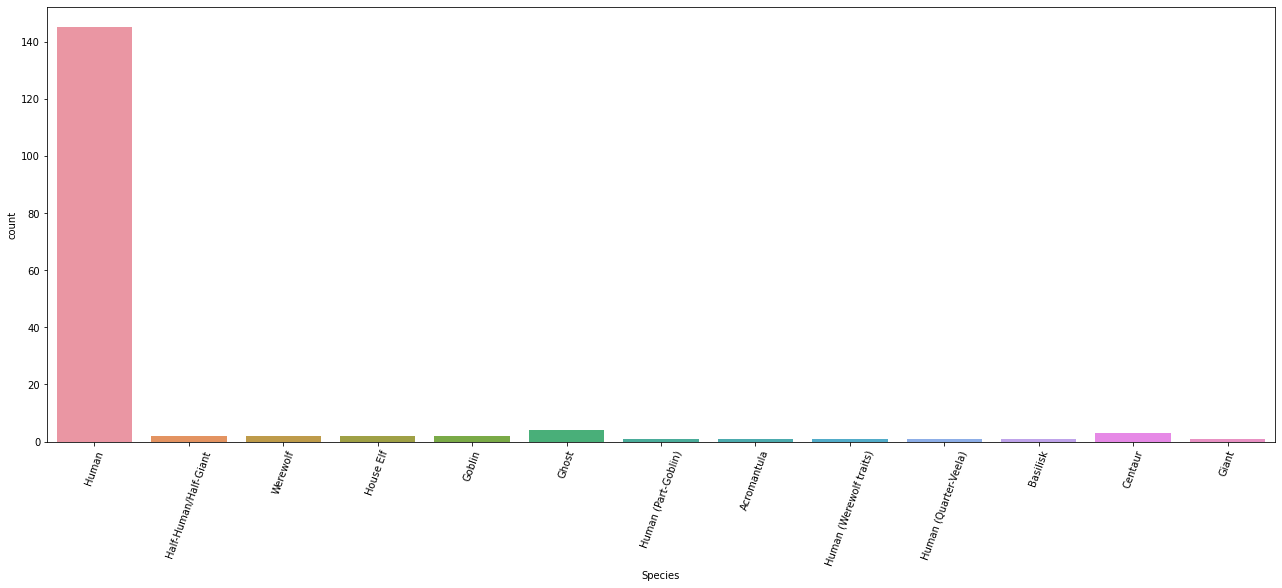

In [39]:
plt.figure(figsize=(22,8))
sns.countplot(x='Species',data = cha_df)
plt.xticks(rotation=70)
plt.show()

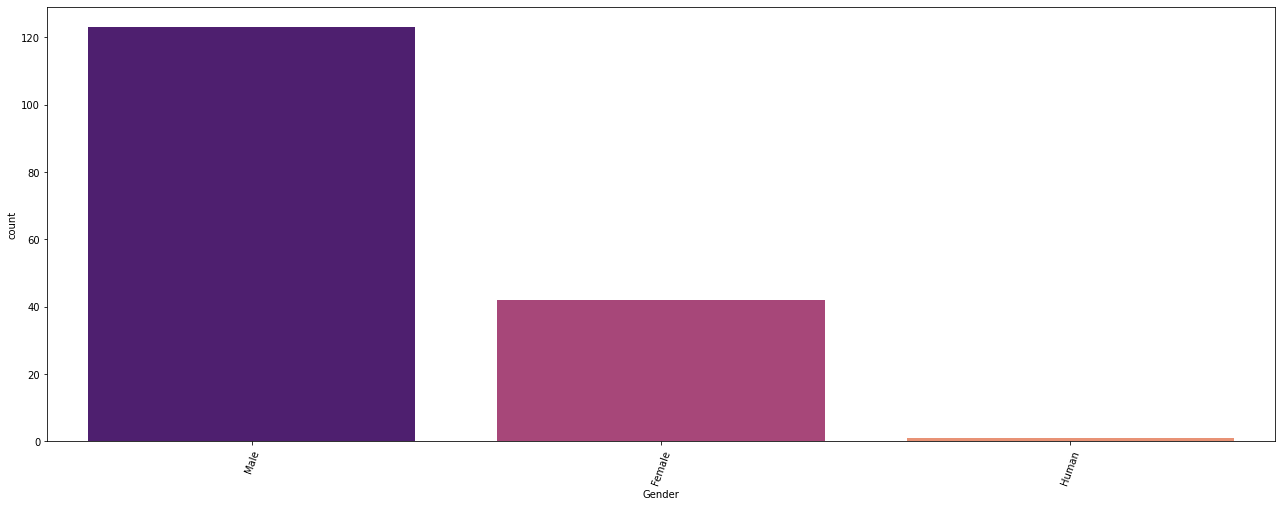

In [40]:
plt.figure(figsize=(22,8))
sns.countplot(x='Gender',data = cha_df,palette='magma')
plt.xticks(rotation=70)
plt.show()

In [41]:
# def LABEL_ENCODING(c1):
#     from sklearn import preprocessing
#     label_encoder = preprocessing.LabelEncoder()
#     cha_df[c1]= label_encoder.fit_transform(cha_df[c1])
#     cha_df[c1].unique()
# LABEL_ENCODING("Gender")
# LABEL_ENCODING("Species")
# cha_df

In [42]:
cha_df.head()

,Character Name,Species,Gender
0,Harry Potter,Human,Male
1,Ron Weasley,Human,Male
2,Hermione Granger,Human,Female
3,Albus Dumbledore,Human,Male
4,Rubeus Hagrid,Half-Human/Half-Giant,Male


In [43]:
cha_df.head(3)

,Character Name,Species,Gender
0,Harry Potter,Human,Male
1,Ron Weasley,Human,Male
2,Hermione Granger,Human,Female


In [44]:
harry = (cha_df.loc[cha_df['Character Name']=="Harry Potter"])
ron = (cha_df.loc[cha_df['Character Name']=="Ron Weasley"])
hermione = (cha_df.loc[cha_df['Character Name']=="Hermione Granger"])


In [45]:
harry

,Character Name,Species,Gender
0,Harry Potter,Human,Male


In [46]:
ron

,Character Name,Species,Gender
1,Ron Weasley,Human,Male


In [47]:
hermione

,Character Name,Species,Gender
2,Hermione Granger,Human,Female


# Data Dictionary

In [48]:
dic_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Data_Dictionary.csv")

In [49]:
dic_data.head()

,Table,Field,Description
0,Movies,Movie ID,Unique identifier for each movie
1,NaN,Movie Title,Full movie name
2,NaN,Release Year,Year the movie was released in theaters
3,NaN,Runtime,Length of the movie in minutes
4,NaN,Budget,Budget for the movie is US Dollars


In [50]:
# dic_data.shape

In [51]:
# dic_data.isnull().sum()

In [52]:
# msno.bar(dic_data)
# plt.show()

In [53]:
# dic_data = dic_data.drop('Table',axis=1)

# Dialogue dataset

In [54]:
dia_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Dialogue.csv",encoding= 'unicode_escape')

In [55]:
dia_data.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.


In [56]:
dia_data.isnull().sum()

Dialogue ID     0
Chapter ID      0
Place ID        0
Character ID    0
Dialogue        0
dtype: int64

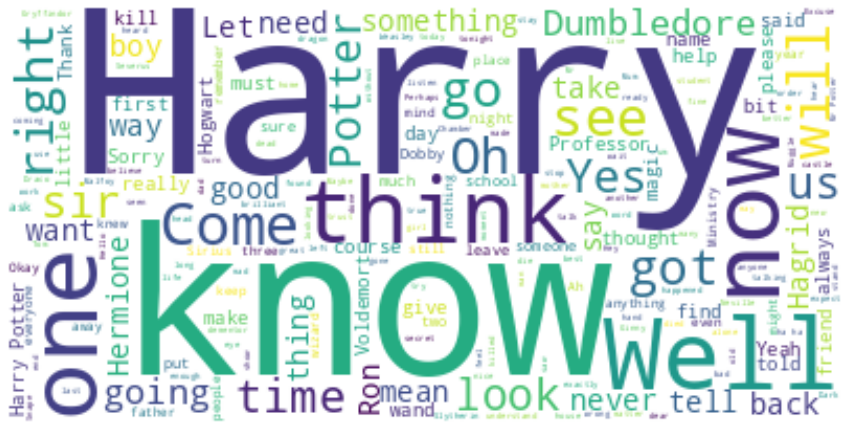

In [57]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in dia_data.Dialogue)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Movies DataSet

![](https://i.guim.co.uk/img/media/7ee96d1a9163157f45a14ebd09f3bd2d5b852b32/183_260_1839_1104/master/1839.jpg?width=465&quality=45&auto=format&fit=max&dpr=2&s=1f662b5ce1f6ea7ec9edc6cbfc722cc4)

In [58]:
mov_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Movies.csv")

In [59]:
mov_data.head()

,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"$130,000,000","$796,700,000"
3,4,Harry Potter and the Goblet of Fire,2005,157,"$150,000,000","$896,400,000"
4,5,Harry Potter and the Order of the Phoenix,2007,138,"$150,000,000","$942,000,000"


In [60]:
mov_data.shape

(8, 6)

In [61]:
mov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie ID      8 non-null      int64 
 1   Movie Title   8 non-null      object
 2   Release Year  8 non-null      int64 
 3   Runtime       8 non-null      int64 
 4   Budget        8 non-null      object
 5   Box Office    8 non-null      object
dtypes: int64(3), object(3)
memory usage: 512.0+ bytes


In [62]:
mov_data.dtypes

Movie ID         int64
Movie Title     object
Release Year     int64
Runtime          int64
Budget          object
Box Office      object
dtype: object

In [63]:
# Delete "$" sign from budget and box office columns.
mov_data["Budget"] = mov_data["Budget"].apply(lambda x: x.split('$')[1])
mov_data["Box Office"] = mov_data["Box Office"].apply(lambda x: x.split('$')[1])

# Delete "," sign.
mov_data["Budget"] = mov_data["Budget"].apply(lambda x: int(x.replace(',','')))
mov_data["Box Office"] = mov_data["Box Office"].apply(lambda x: int(x.replace(',','')))

In [64]:
mov_data.head()

,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,125000000,1002000000
1,2,Harry Potter and the Chamber of Secrets,2002,161,100000000,880300000
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,130000000,796700000
3,4,Harry Potter and the Goblet of Fire,2005,157,150000000,896400000
4,5,Harry Potter and the Order of the Phoenix,2007,138,150000000,942000000


In [65]:
mov_data.dtypes

Movie ID         int64
Movie Title     object
Release Year     int64
Runtime          int64
Budget           int64
Box Office       int64
dtype: object

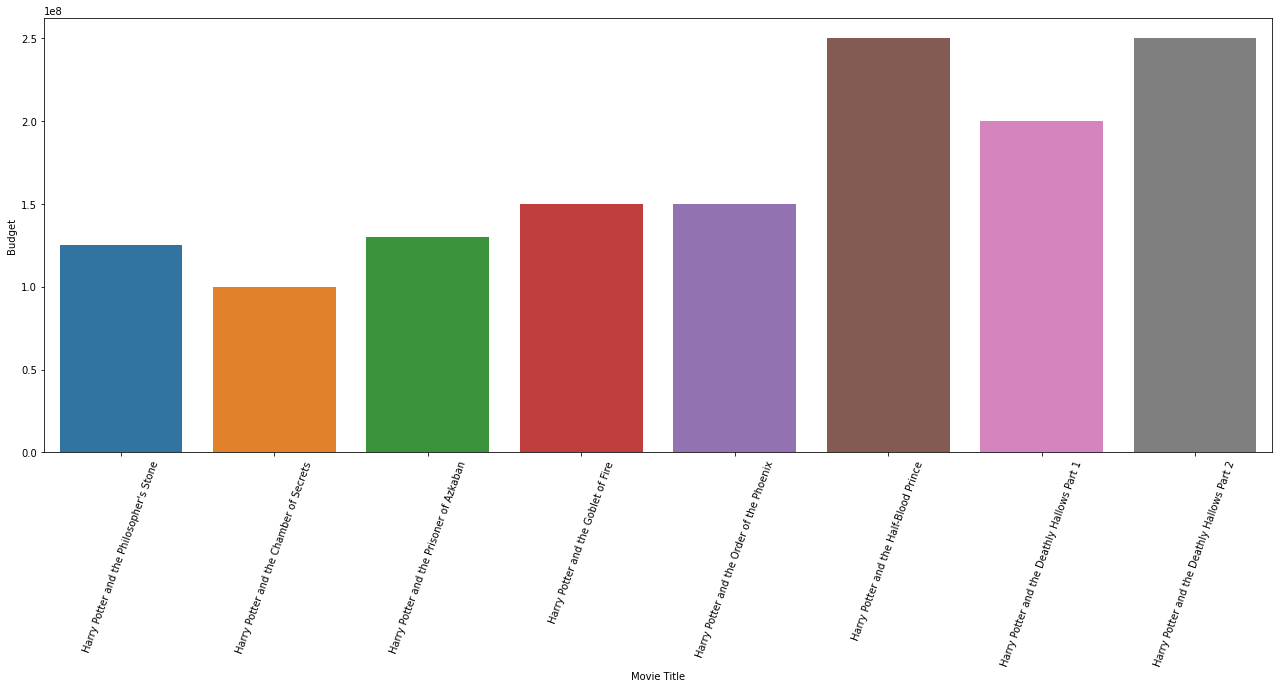

In [66]:
plt.figure(figsize=(22,8))
sns.barplot(x="Movie Title", y="Budget",data=mov_data)
plt.xticks(rotation=70)
plt.show()


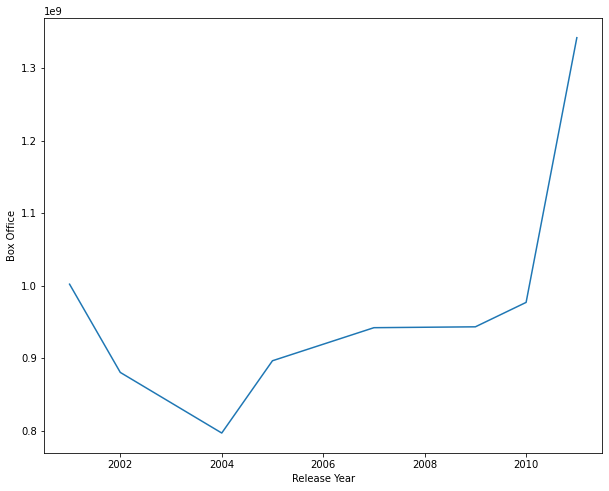

In [67]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Release Year',y= 'Box Office',data = mov_data)
plt.show()

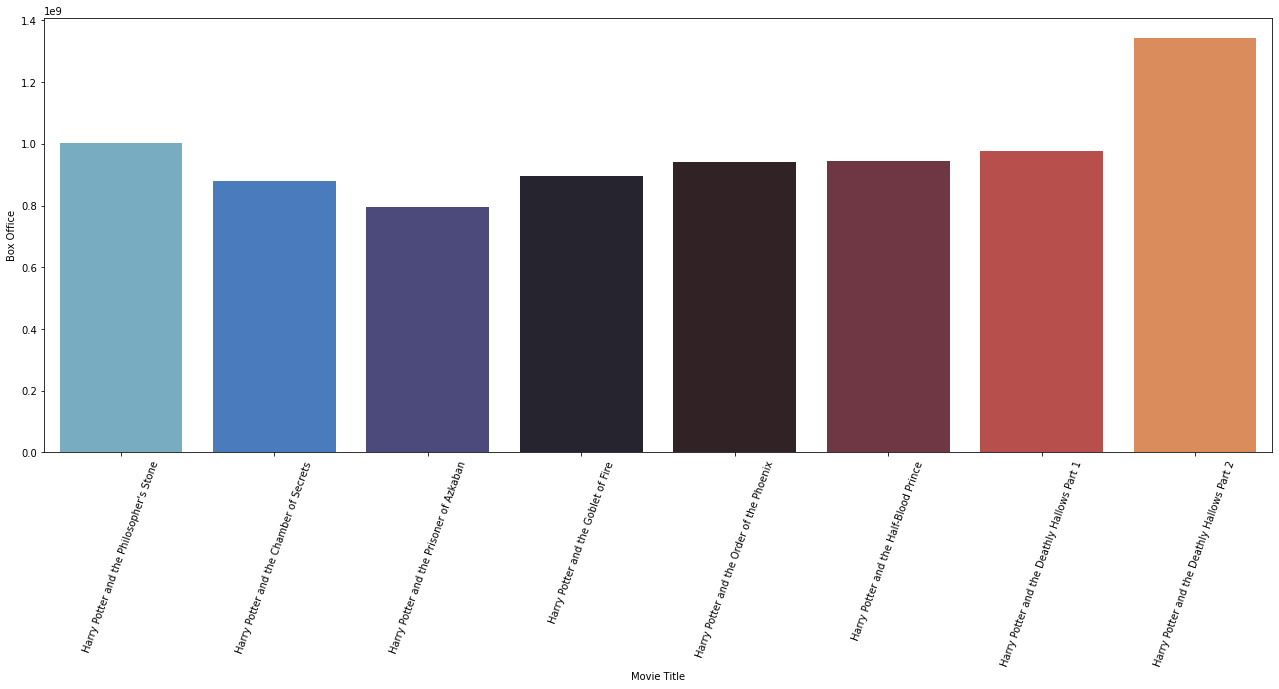

In [68]:
plt.figure(figsize=(22,8))
sns.barplot(x="Movie Title", y="Box Office",data=mov_data,palette='icefire')
plt.xticks(rotation=70)
plt.show()

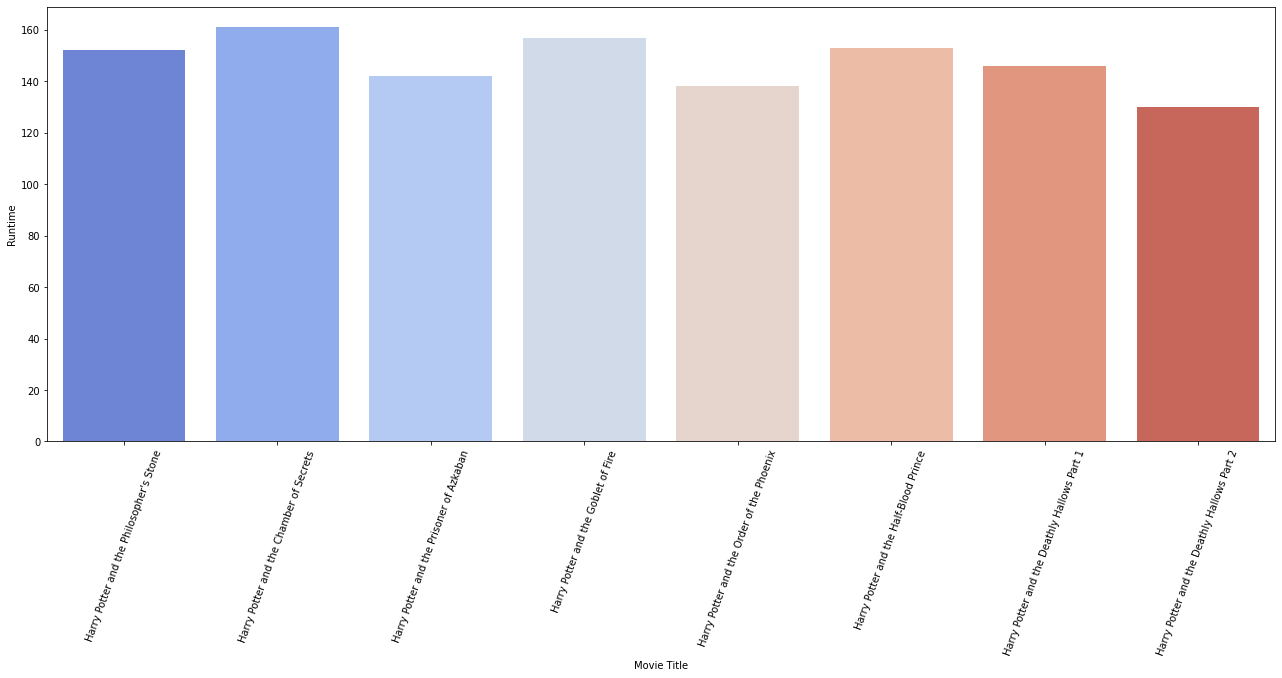

In [69]:
plt.figure(figsize=(22,8))
sns.barplot(x="Movie Title", y="Runtime",data=mov_data,palette='coolwarm')
plt.xticks(rotation=70)
plt.show()

# Places DataSet

![](https://e7.pngegg.com/pngimages/513/860/png-clipart-hogwarts-seal-illustration-harry-potter-hogwarts-gryffindor-slytherin-house-crest-shield-helga-hufflepuff-thumbnail.png)

In [70]:
pla_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Places.csv")

In [71]:
pla_data.head()

,Place ID,Place Name,Place Category
0,1,Flourish & Blotts,Diagon Alley
1,2,Gringotts Wizarding Bank,Diagon Alley
2,3,Knockturn Alley,Diagon Alley
3,4,Ollivanders,Diagon Alley
4,5,The Leaky Cauldron,Diagon Alley


In [72]:
pla_data.isnull().sum()

Place ID          0
Place Name        0
Place Category    0
dtype: int64

In [73]:
pla_data.nunique()

Place ID          74
Place Name        74
Place Category     5
dtype: int64

In [74]:
pla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Place ID        74 non-null     int64 
 1   Place Name      74 non-null     object
 2   Place Category  74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


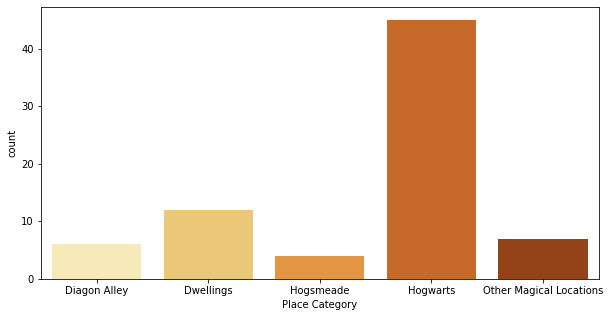

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x='Place Category',data = pla_data,palette='YlOrBr')
plt.show()

In [76]:
pla_data = pla_data.rename(columns = {'Place Name': 'place_name'}, inplace = False)

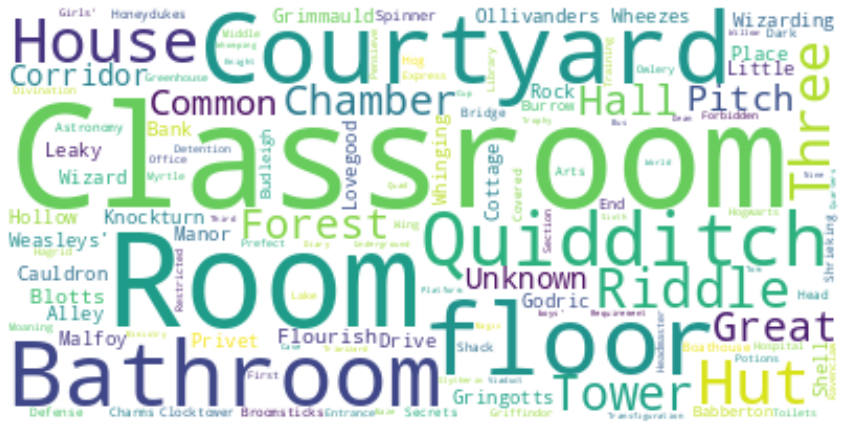

In [77]:
text = " ".join(i for i in pla_data.place_name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Spells DataSet

![](https://cdn-icons-png.flaticon.com/128/867/867855.png)

In [78]:
spells_data = pd.read_csv("../input/harry-potter-movies-dataset/Harry_Potter_Movies/Spells.csv")

In [79]:
spells_data.head()

,Spell ID,Incantation,Spell Name,Effect,Light
0,1,Accio,Summoning Charm,Summons an object,NaN
1,2,Aguamenti,Water-Making Spell,Conjures water,Icy blue
2,3,Alarte Ascendare,Launch an object up into the air,Rockets target upward,Red
3,4,Alohomora,Unlocking Charm,Unlocks target,Blue
4,5,Arania Exumai,Spider repelling spell,Repels spiders,Blue


In [80]:
spells_data.isnull().sum()

Spell ID        0
Incantation     0
Spell Name      0
Effect          0
Light          21
dtype: int64

In [81]:
spells_data.dropna()

,Spell ID,Incantation,Spell Name,Effect,Light
1,2,Aguamenti,Water-Making Spell,Conjures water,Icy blue
2,3,Alarte Ascendare,Launch an object up into the air,Rockets target upward,Red
3,4,Alohomora,Unlocking Charm,Unlocks target,Blue
4,5,Arania Exumai,Spider repelling spell,Repels spiders,Blue
6,7,Avada Kedavra,Killing Curse,Instantaneous death,Green
8,9,Brackium Emendo,Brackium Emendo,Mends bones,Blue
9,10,Cistem Aperio,Cistem Aperio,Opens chests,White
11,12,Confringo,Blasting Curse,Explosion,Fiery Orange
12,13,Crucio,Cruciatus Curse,Excruciating pain,Red
13,14,Diffindo,Severing Charm,Cuts objects,Light green


In [82]:
spells_data.nunique()

Spell ID       61
Incantation    61
Spell Name     61
Effect         61
Light          17
dtype: int64

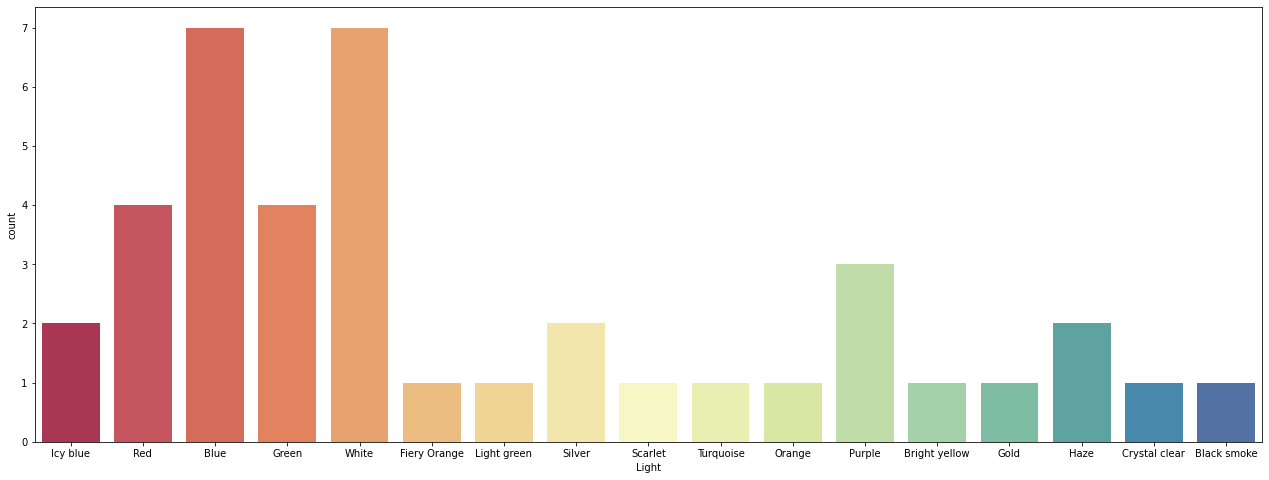

In [83]:
plt.figure(figsize=(22,8))
sns.countplot( x = 'Light',data = spells_data,palette="Spectral")
plt.show()

In [84]:
spells_data = spells_data.rename(columns = {'Spell Name': 'spell_name'}, inplace = False)

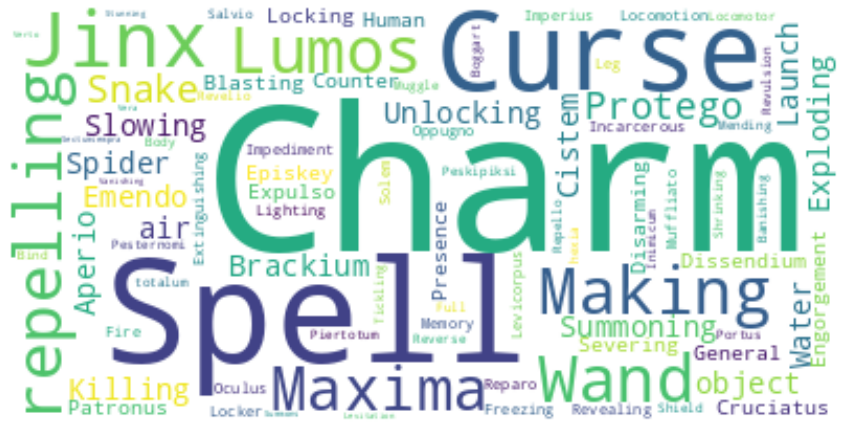

In [85]:
text = " ".join(i for i in spells_data.spell_name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

![image.png](https://cdn-icons-png.flaticon.com/128/1600/1600953.png)